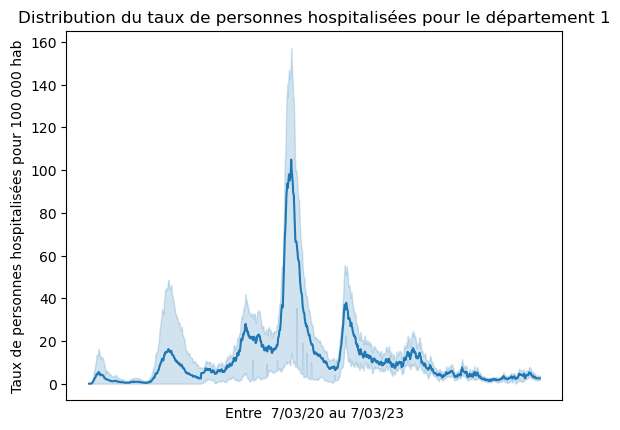

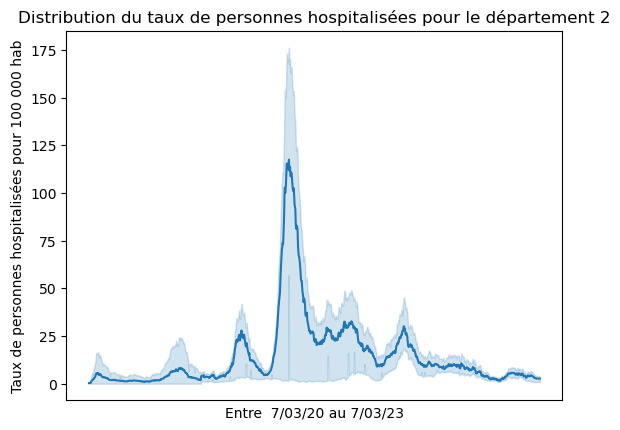

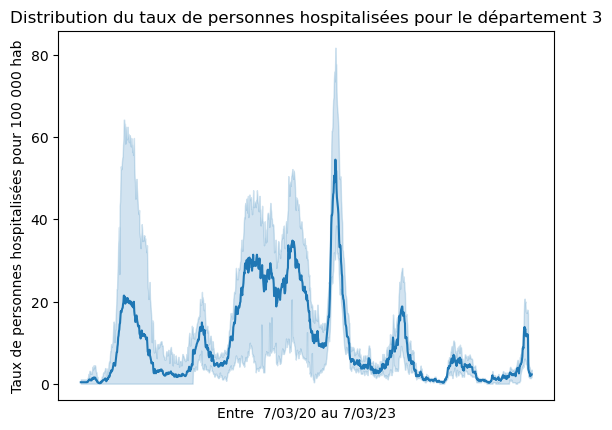

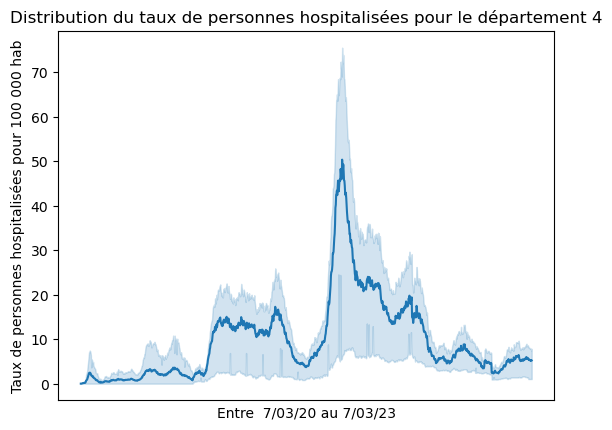

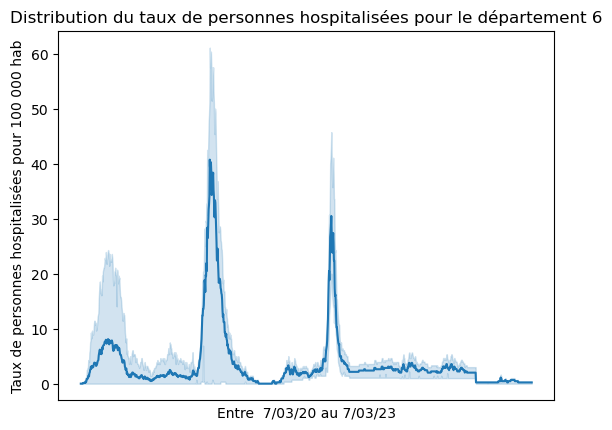

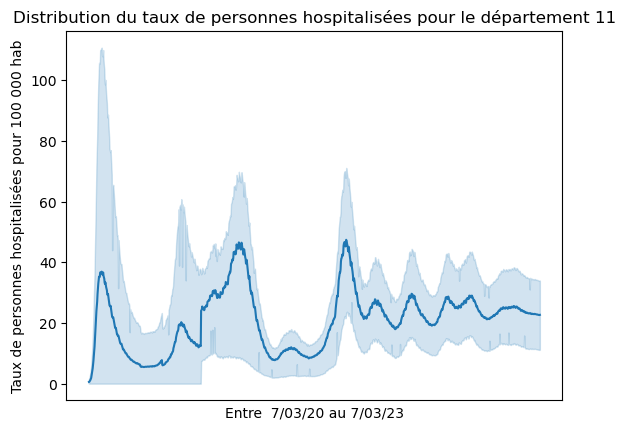

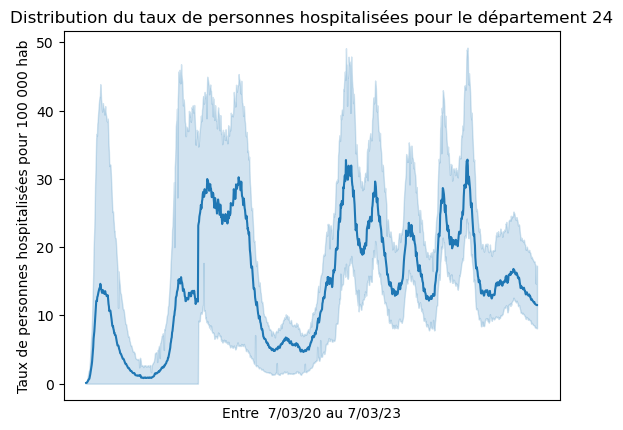

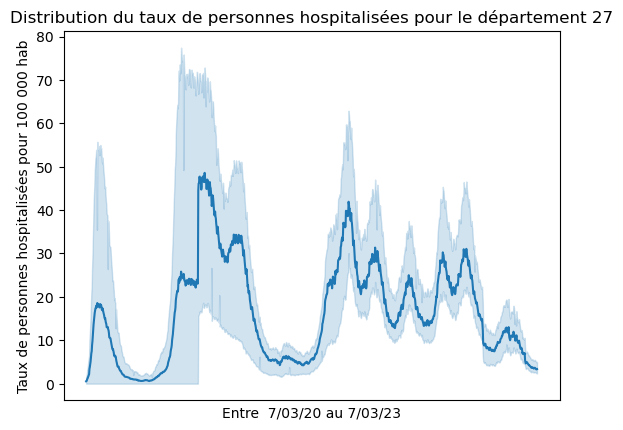

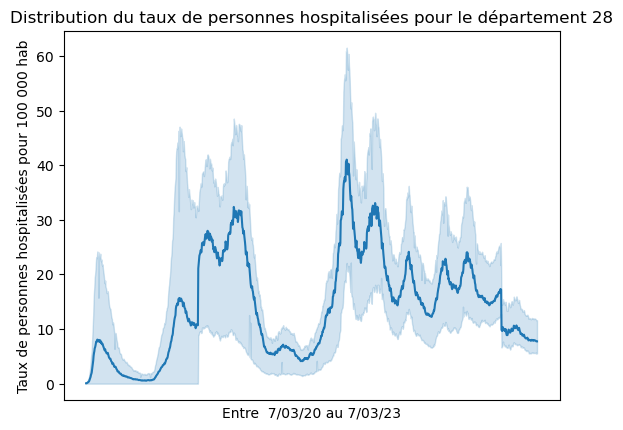

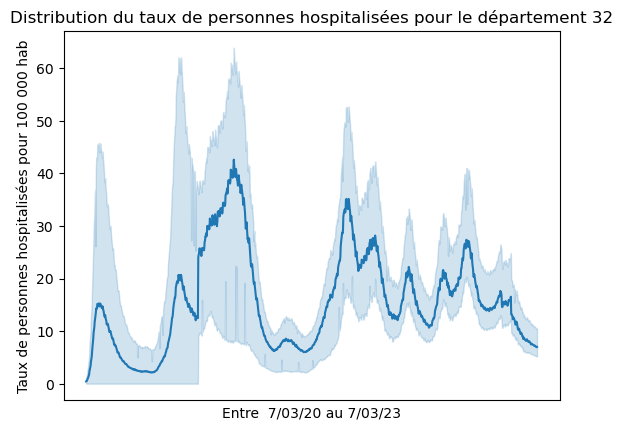

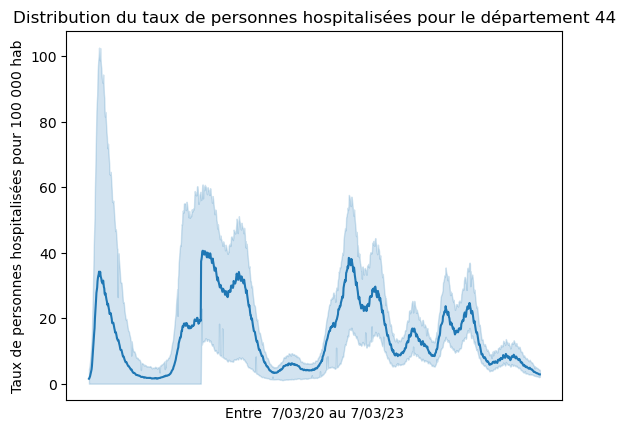

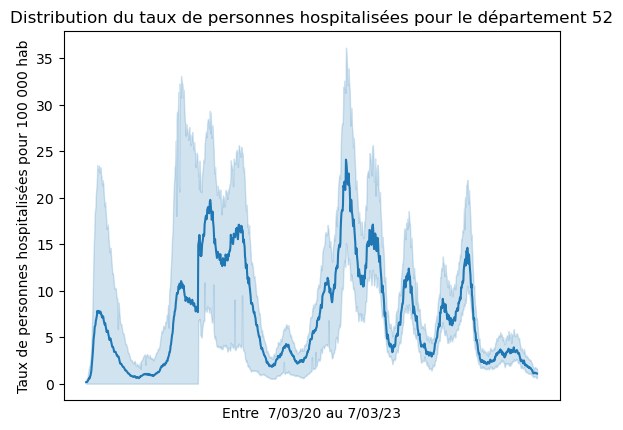

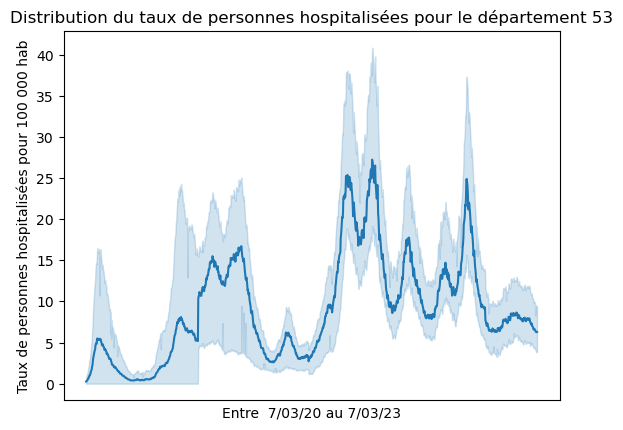

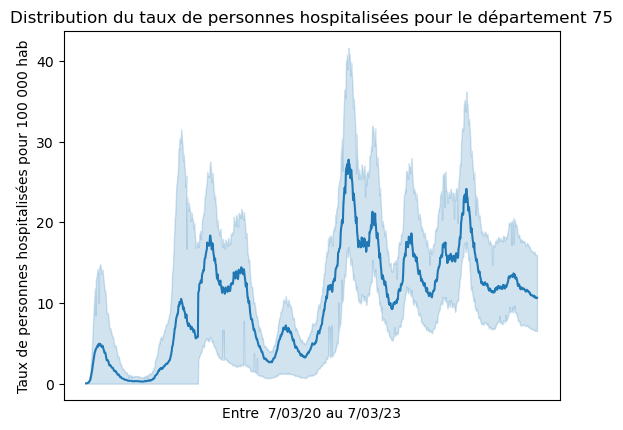

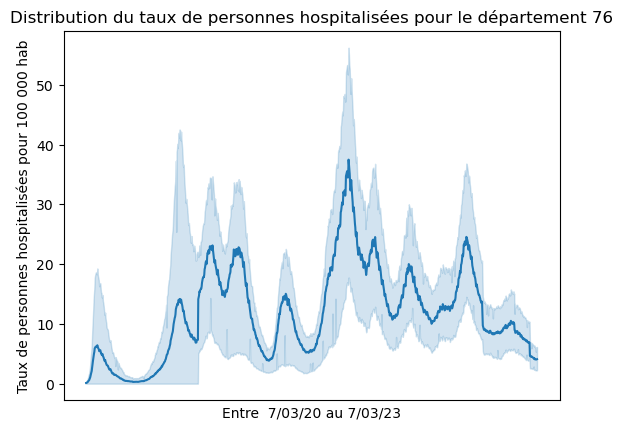

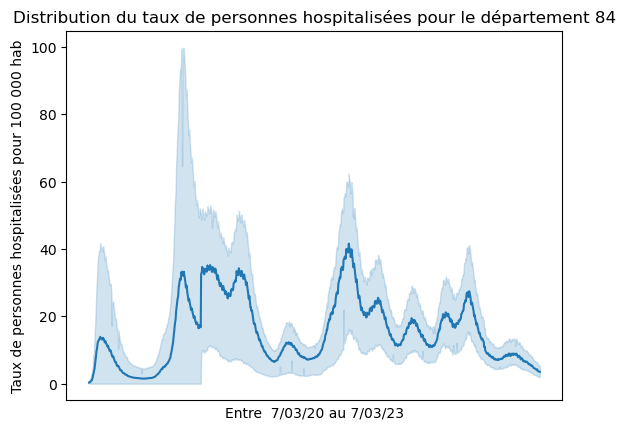

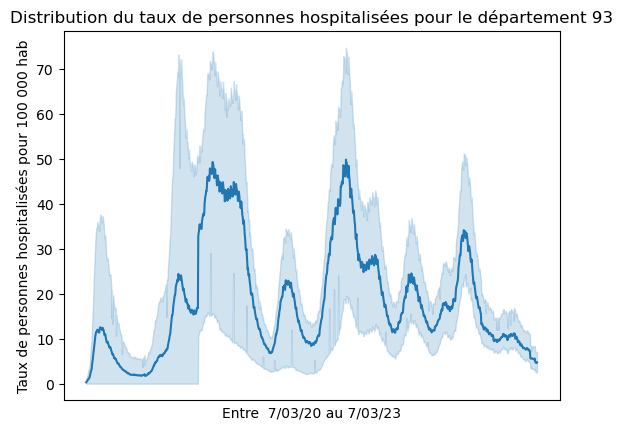

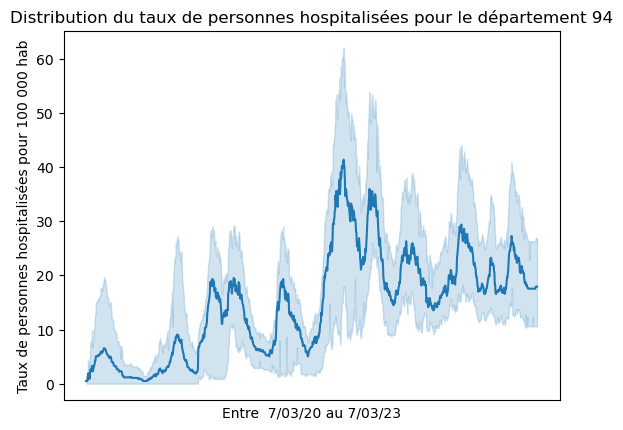

In [2]:
import pandas as pd # bibliothèque permettant de récupérer les différentes données 
import seaborn as sns
import matplotlib.pyplot as plt # bibliothèque permettant de faire les graphiques
df = pd.read_csv('donnee_eco_urbaine.csv',sep=';') # on récupere les données dans un fichier .csv qui est séparer par des points virgules

# Créer des graphiques différents en fonction des valeurs de la colonne 'reg' pour cela on utilise une boucle for 
for departement in df['dep'].unique(): 
    # Filtrer le DataFrame pour les données de la région spécifique
    df_departement = df[df['dep'] == departement]
    
    # Créer un graphique différent en fonction de la région
    plt.figure() 
    sns.lineplot(data=df_departement, x='jour', y='tx_prev_hosp') # graphique linéaire mettant en lien 
    plt.title(f'Distribution du taux de personnes hospitalisées pour le département {departement}') # mettre le titre du graphique
    plt.xlabel('Entre  7/03/20 au 7/03/23') # mettre un titre pour l'axe des abscisses
    plt.ylabel('Taux de personnes hospitalisées pour 100 000 hab') # mettre un titre pour l'axe des ordonnées
    plt.xticks([]) # permet d'enlever de ne pas montrer toutes les dates sur l'axe des abscisse
    plt.show() # permet de montrer le graphique

    # temps d'éxecution 15 minutes pour montrer l'ensemble des graphiques


C:\Users\matte\AppData\Local\Temp\ipykernel_18600\586339666.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')


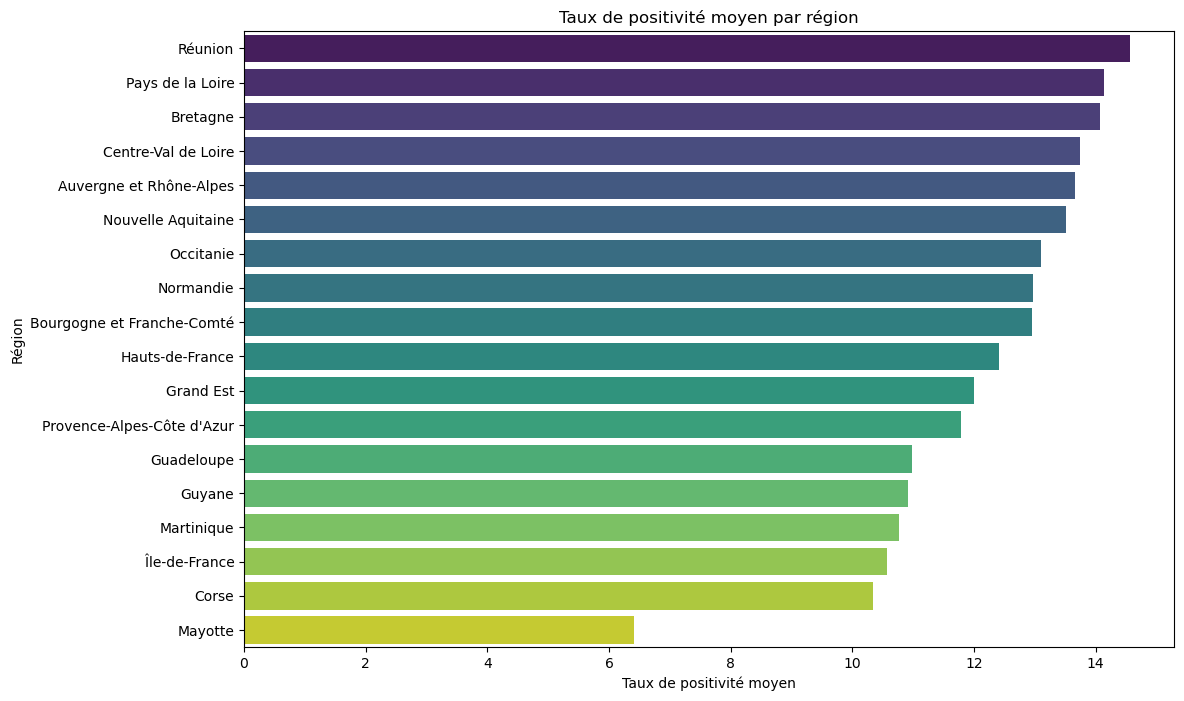

In [88]:
import pandas as pd # bibliothèque permettant de récupérer les différentes données 
import seaborn as sns
import matplotlib.pyplot as plt # bibliothèque permettant de faire les graphiques
df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv') 
# Sélectionner les colonnes nécessaires
data = df[['lib_reg', 'tx_pos']]

# Agréger les données pour obtenir le taux de positivité moyen pour chaque région
average_positivity = data.groupby('lib_reg')['tx_pos'].mean().reset_index()

# Trier les données par taux de positivité moyen
average_positivity = average_positivity.sort_values(by='tx_pos', ascending=False)

# Créer un graphique à barres
plt.figure(figsize=(12, 8))
sns.barplot(data=average_positivity, x='tx_pos', y='lib_reg', palette='viridis')
plt.title('Taux de positivité moyen par région')
plt.xlabel('Taux de positivité moyen')
plt.ylabel('Région')
plt.show()

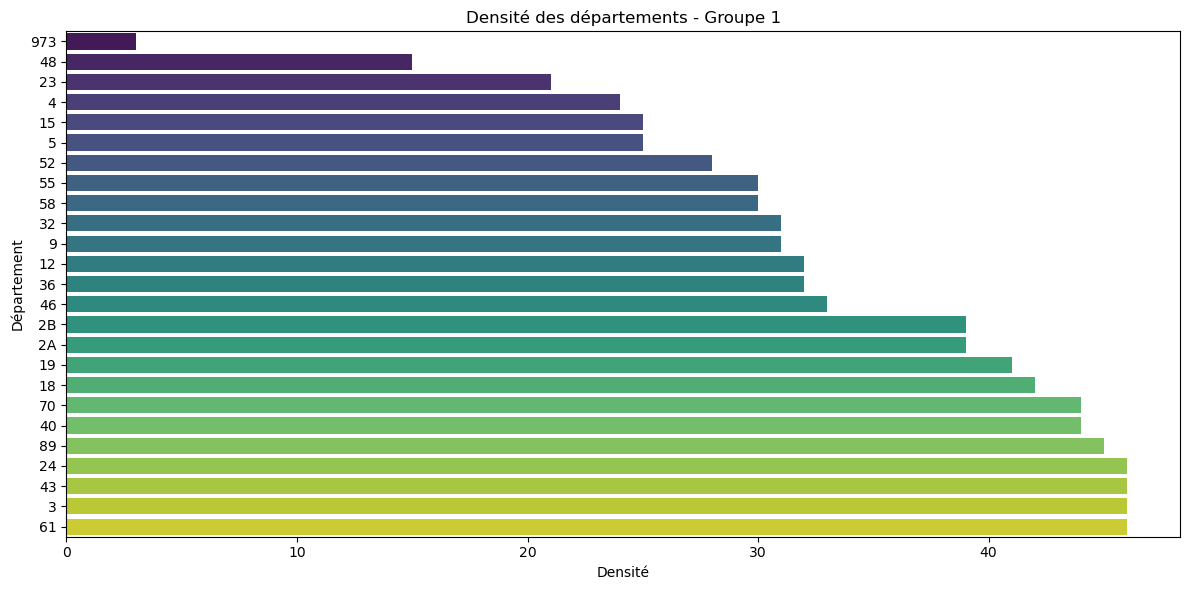

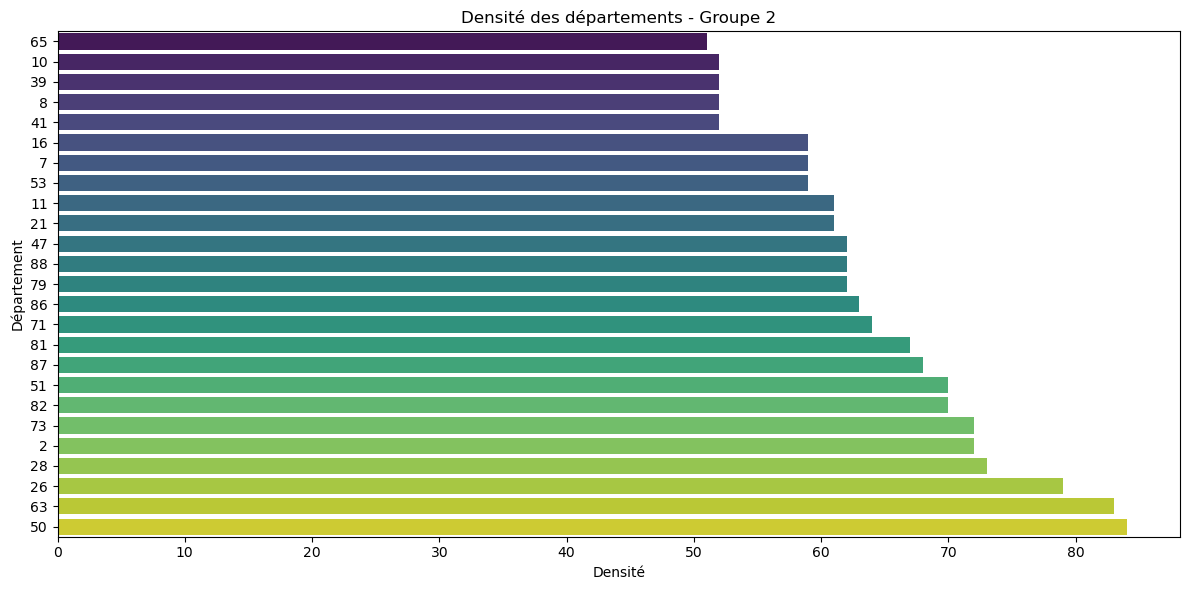

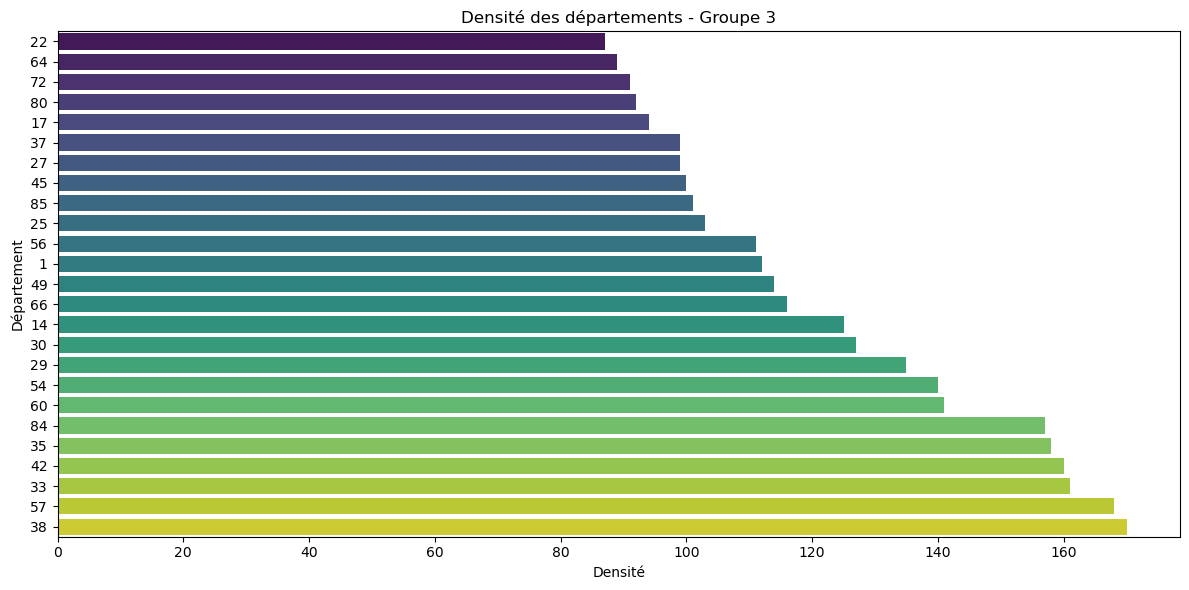

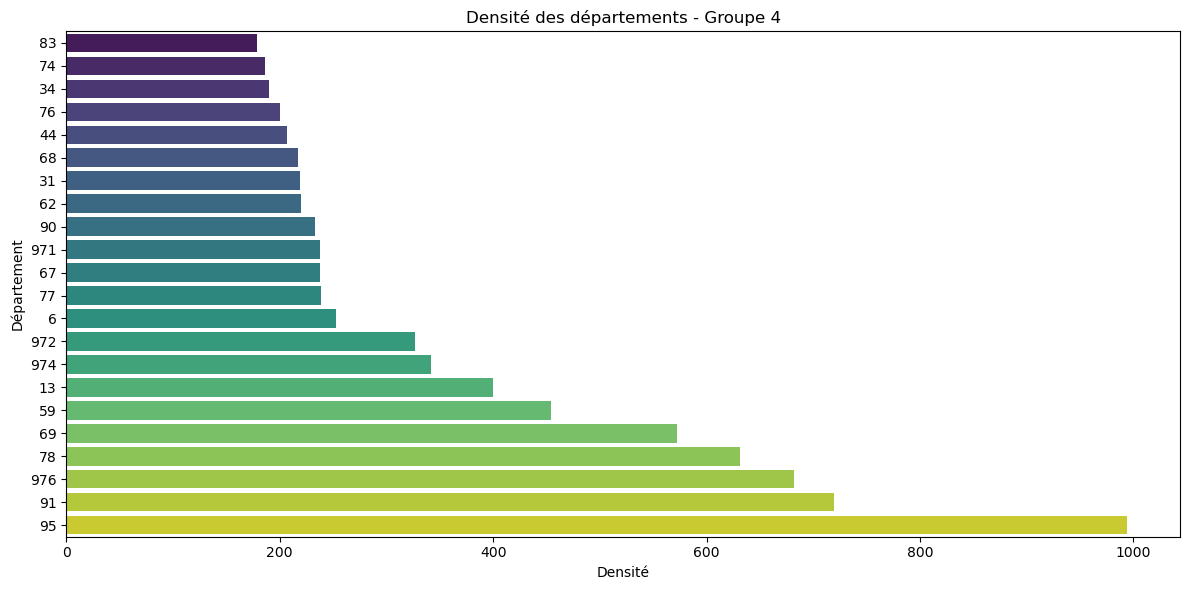

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('densite-par-dep.csv', sep=';')

# Convertir la colonne 'Densité' en un type numérique
df['Densité'] = pd.to_numeric(df['Densité'], errors='coerce')

# Diviser les données en cinq groupes de 25, 25, 25, 22 et 4 départements
group_sizes = [25, 25, 25, 22]
grouped_df = []
start_index = 0
for size in group_sizes:
    end_index = start_index + size
    grouped_df.append(df.iloc[start_index:end_index])
    start_index = end_index

# Créer un graphique à barres horizontales pour chaque groupe de départements
for group_num, group_data in enumerate(grouped_df, start=1):
    plt.figure(figsize=(12, 6))
    sns.barplot(data=group_data, x='Densité', y='DEP', palette='viridis')
    plt.title(f'Densité des départements - Groupe {group_num}')
    plt.xlabel('Densité')
    plt.ylabel('Département')
    plt.tight_layout()
    plt.show()





C:\Users\matte\AppData\Local\Temp\ipykernel_18600\4063356439.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')


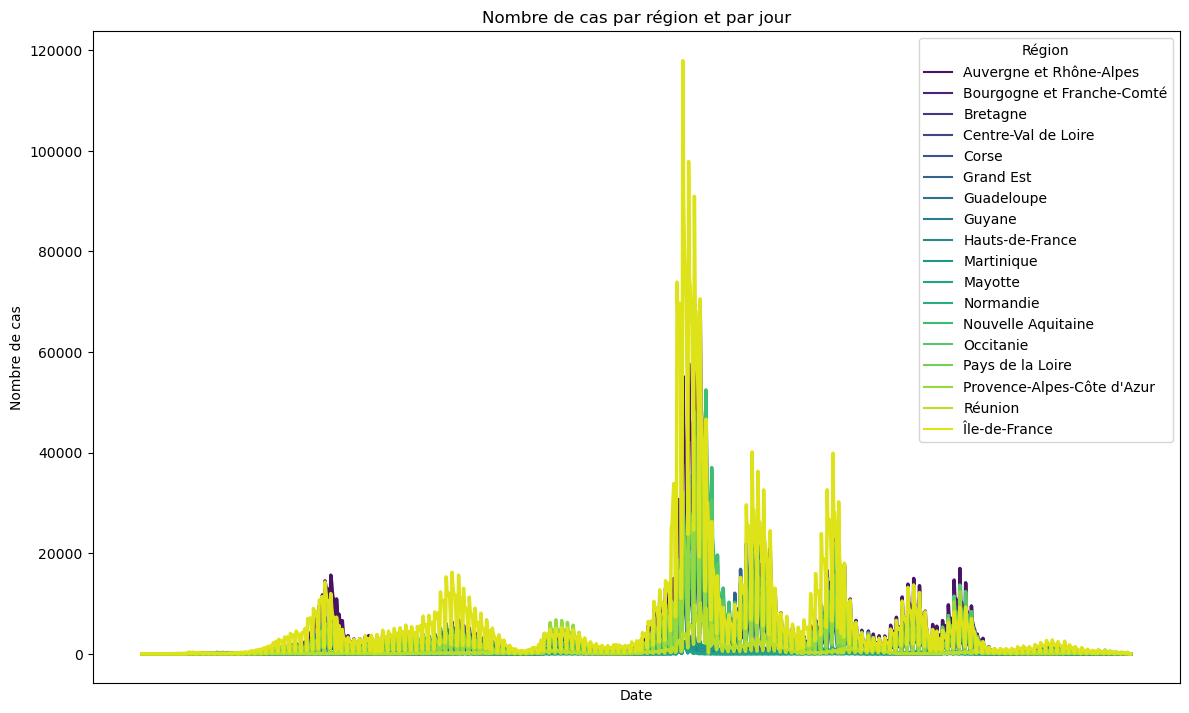

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')

# Sélectionner les colonnes nécessaires
data = df[['date', 'lib_reg', 'pos']]

# on utilise le nombre de cas par région et par jour
cases_by_region_day = data.groupby(['date', 'lib_reg'])['pos'].sum().reset_index()

# Créer un graphique linéaire pour chaque région
plt.figure(figsize=(12, 8))
sns.lineplot(data=cases_by_region_day, x='date', y='pos', hue='lib_reg', palette='viridis', linewidth=2.5)
plt.title('Nombre de cas par région et par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)
plt.legend(title='Région')
plt.tight_layout()
plt.xticks([])
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_944\3234761711.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')


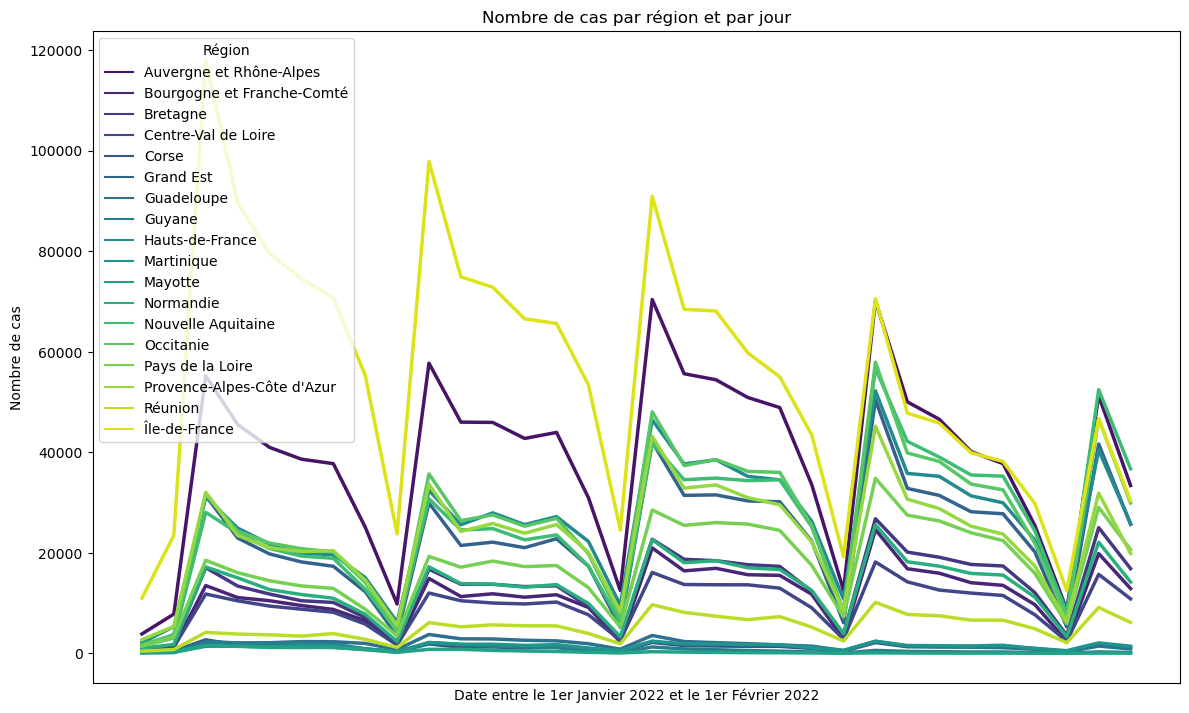

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Charger les données
df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')

# Convertir la colonne 'date' en format datetime
df['date'] = pd.to_datetime(df['date'])

# Filtrer les données entre les dates spécifiées
start_date = datetime(2022, 1, 1)
end_date = datetime(2022, 2, 1)
filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Sélectionner les colonnes nécessaires
data = filtered_data[['date', 'lib_reg', 'pos']]

# on utilise le nombre de cas par région et par jour
cases_by_region_day = data.groupby(['date', 'lib_reg'])['pos'].sum().reset_index()

# Créer un graphique linéaire pour chaque région
plt.figure(figsize=(12, 8))
sns.lineplot(data=cases_by_region_day, x='date', y='pos', hue='lib_reg', palette='viridis', linewidth=2.5)
plt.title('Nombre de cas par région ')
plt.xlabel('Date entre le 1er Janvier 2022 et le 1er Février 2022')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)
plt.legend(title='Région')
plt.tight_layout()
plt.xticks([])
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_944\4245397933.py:7: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')


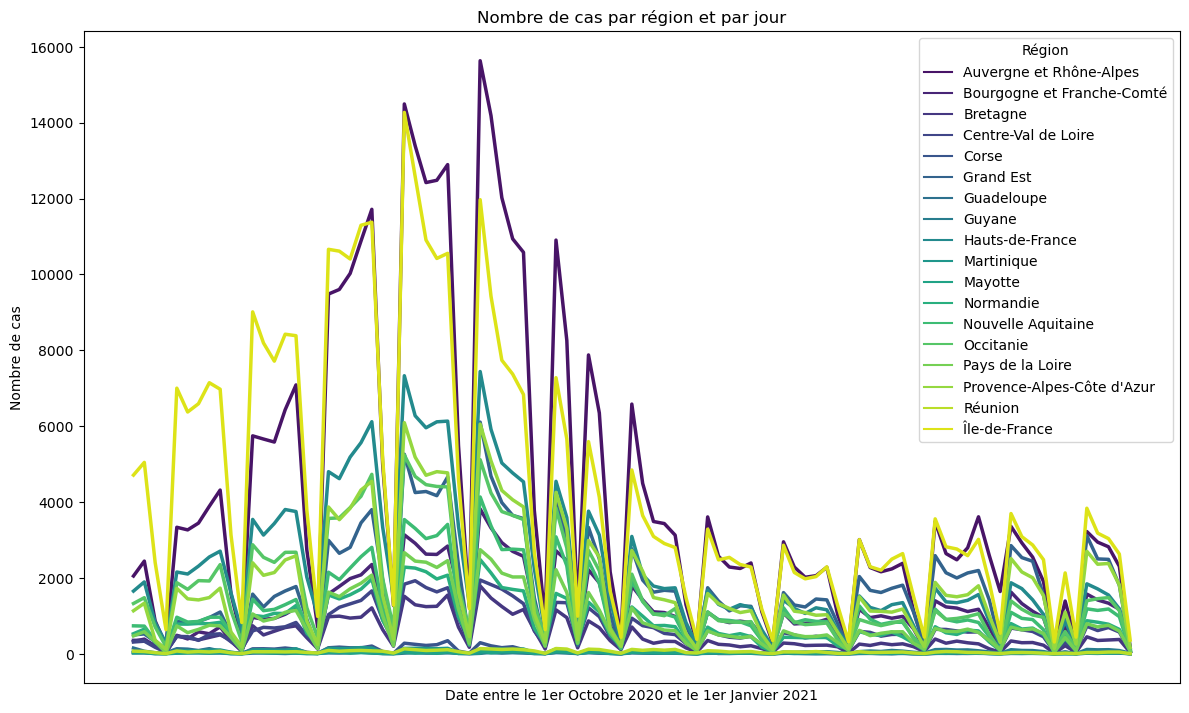

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

# Charger les données
df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')

# Convertir la colonne 'date' en format datetime
df['date'] = pd.to_datetime(df['date'])

# Filtrer les données entre les dates spécifiées
start_date = datetime(2020, 10, 1)
end_date = datetime(2021, 1, 1)
filtered_data = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

# Sélectionner les colonnes nécessaires
data = filtered_data[['date', 'lib_reg', 'pos']]

# on utilise le nombre de cas par région et par jour
cases_by_region_day = data.groupby(['date', 'lib_reg'])['pos'].sum().reset_index()

# Créer un graphique linéaire pour chaque région
plt.figure(figsize=(12, 8))
sns.lineplot(data=cases_by_region_day, x='date', y='pos', hue='lib_reg', palette='viridis', linewidth=2.5)
plt.title('Nombre de cas par région')
plt.xlabel('Date entre le 1er Octobre 2020 et le 1er Janvier 2021')
plt.ylabel('Nombre de cas')
plt.xticks(rotation=45)
plt.legend(title='Région')
plt.tight_layout()
plt.xticks([])
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_944\954936484.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')


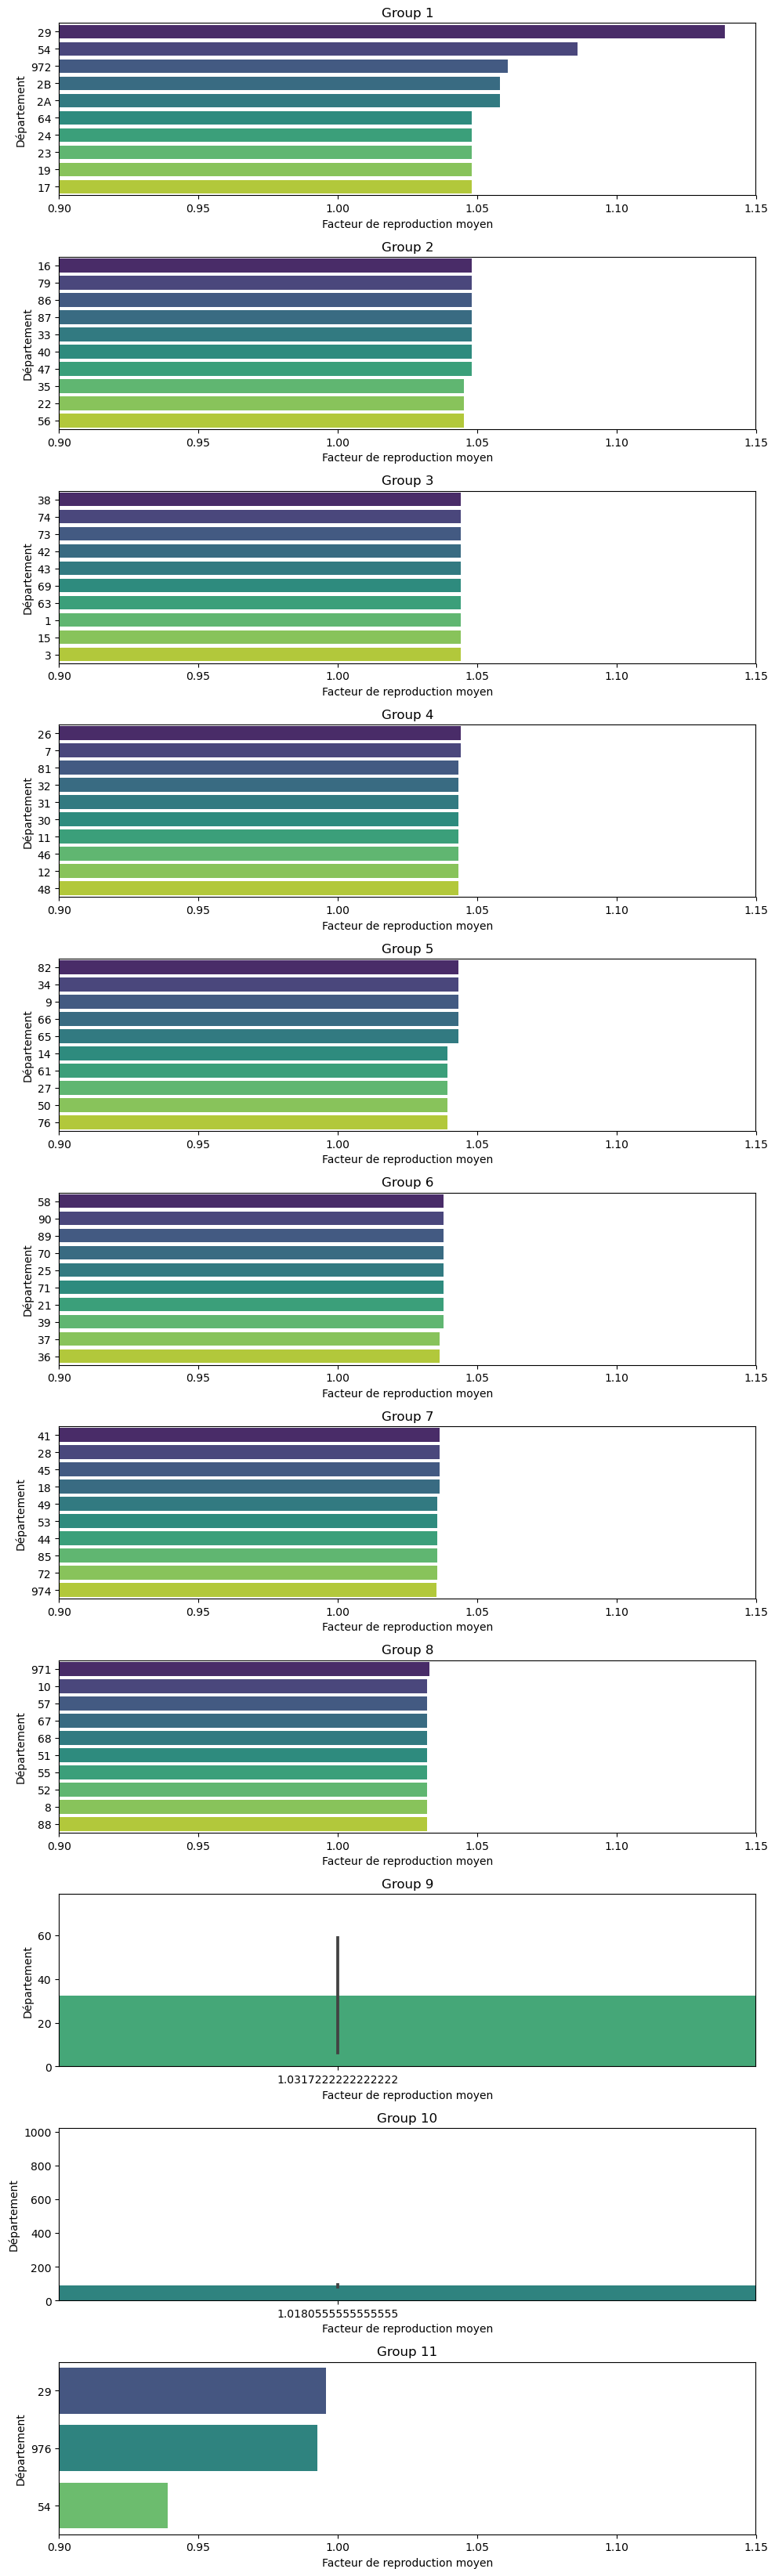

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')

# Sélectionner les colonnes 'dep' et 'R'
data = df[['dep', 'R']]

# Agréger les données pour obtenir le facteur de reproduction moyen par département
reproduction_by_dep = data.groupby('dep')['R'].mean().reset_index()

# Trier les données par facteur de reproduction moyen
reproduction_by_dep = reproduction_by_dep.sort_values(by='R', ascending=False)

# Diviser les départements en groupes de 10
groups = [reproduction_by_dep[i:i+10] for i in range(0, len(reproduction_by_dep), 10)]

# Calculer le nombre de lignes nécessaires pour afficher tous les groupes
num_rows = len(groups)

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(num_rows, 1, figsize=(10, num_rows*3))

# Créer un graphique à barres pour chaque groupe de départements
for i, group in enumerate(groups):
    sns.barplot(data=group, x='R', y='dep', palette='viridis', ax=axes[i])
    axes[i].set_title(f'Group {i+1}')
    axes[i].set_xlabel('Facteur de reproduction moyen')
    axes[i].set_ylabel('Département')
    axes[i].set_xlim(0.9, 1.150)  # Définir l'échelle de l'axe des abscisses

plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_944\1731056116.py:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')


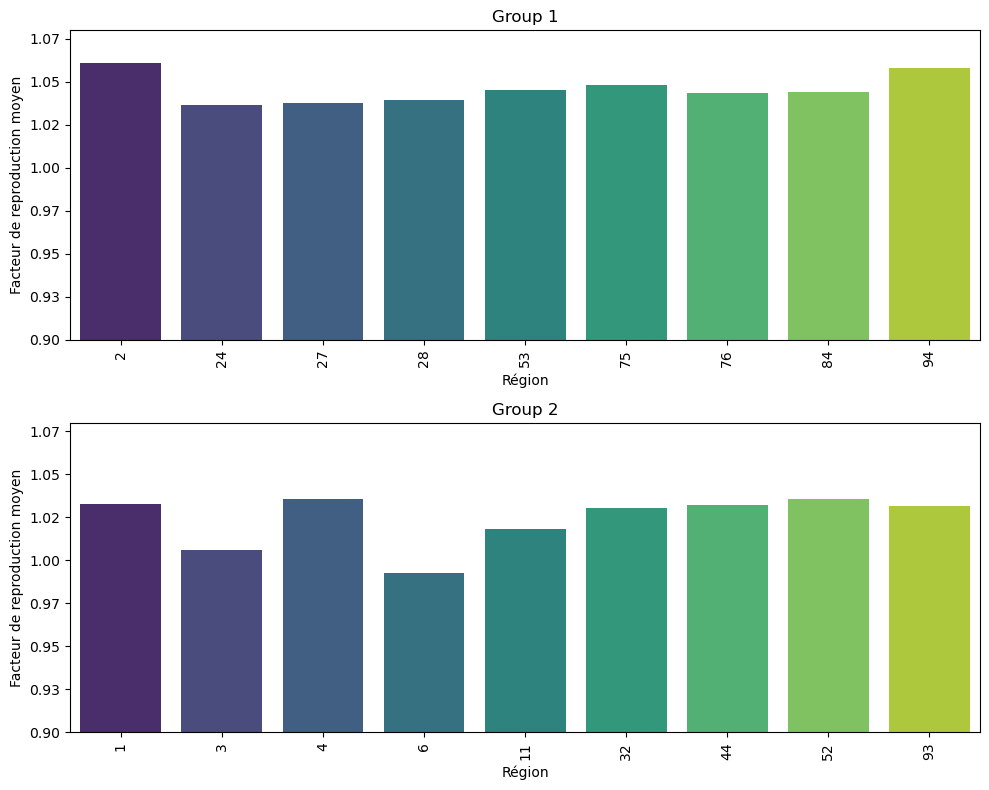

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('table-indicateurs-open-data-dep-2023.csv')

# Sélectionner les colonnes 'reg' et 'R'
data = df[['reg', 'R']]

# Agréger les données pour obtenir le facteur de reproduction moyen par région
reproduction_by_reg = data.groupby('reg')['R'].mean().reset_index()

# Trier les données par facteur de reproduction moyen
reproduction_by_reg = reproduction_by_reg.sort_values(by='R', ascending=False)

# Diviser les régions en deux groupes de 9
groups = [reproduction_by_reg.iloc[:9], reproduction_by_reg.iloc[9:18]]

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Créer un graphique à barres verticales pour chaque groupe de régions
for i, group in enumerate(groups):
    sns.barplot(data=group, x='reg', y='R', palette='viridis', ax=axes[i], orient='v')  # Utilisation de l'orientation verticale
    axes[i].set_title(f'Group {i+1}')
    axes[i].set_xlabel('Région')
    axes[i].set_ylabel('Facteur de reproduction moyen')
    axes[i].tick_params(axis='x', labelrotation=90)  # Rotation des étiquettes de l'axe des abscisses
    axes[i].yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))  # Limiter à 2 décimales sur l'axe des ordonnées
    axes[i].set_ylim(0.9, 1.08)

plt.tight_layout()
plt.show()


C:\Users\matte\AppData\Local\Temp\ipykernel_928\3584770105.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('table-indicateurs-open-data-dep-serie.csv')


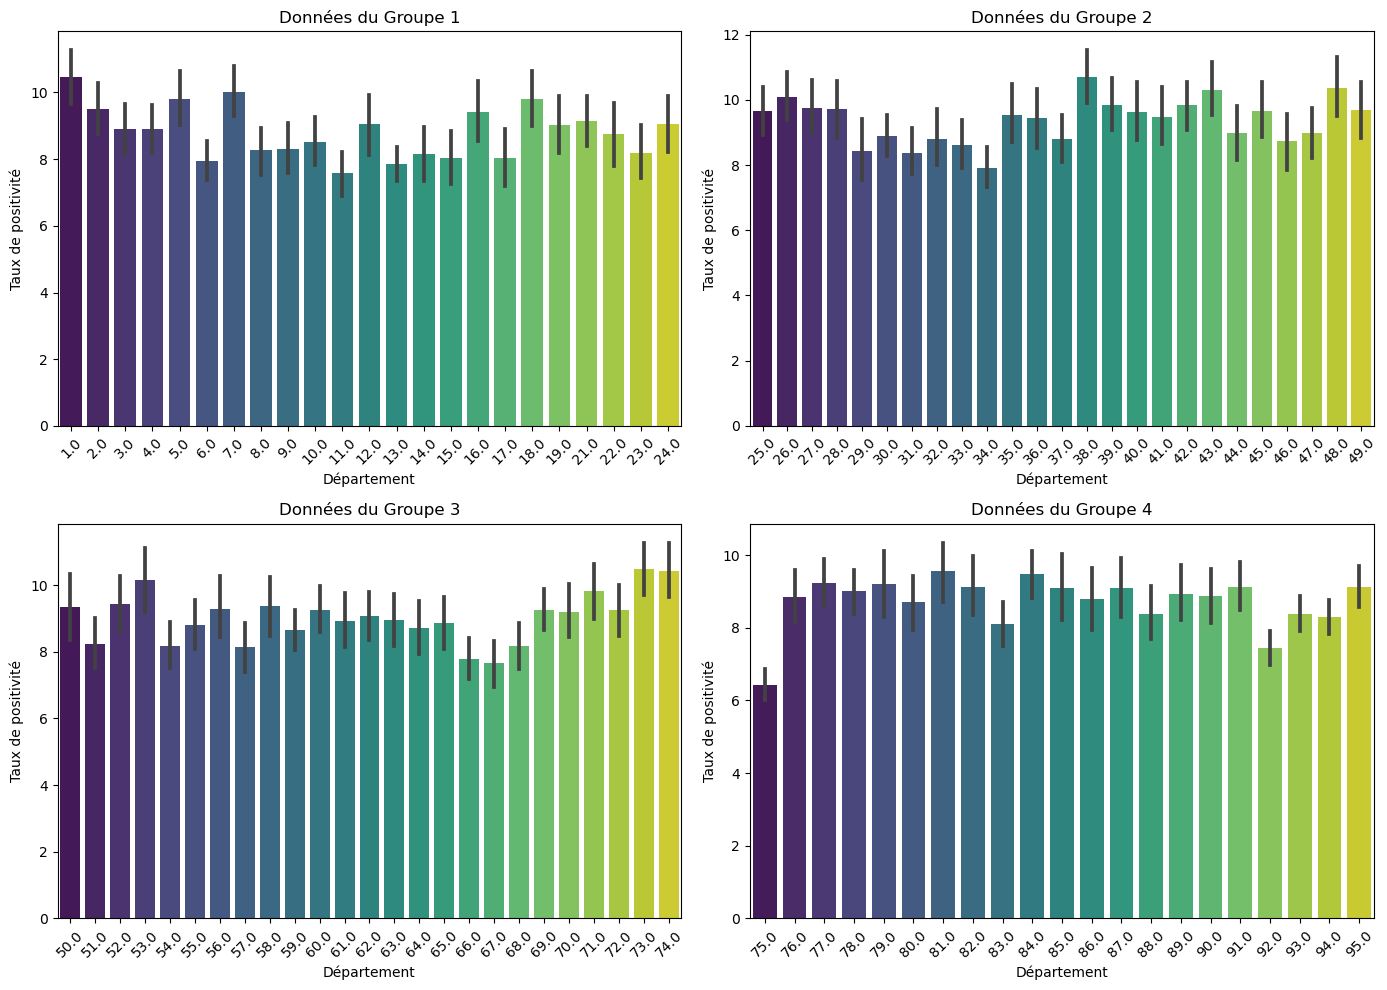

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('table-indicateurs-open-data-dep-serie.csv')

# Convertir la colonne 'departement' en type numérique
df['departement'] = pd.to_numeric(df['departement'], errors='coerce')

# Compter le nombre de départements uniques
nombre_departements = df['departement'].nunique()

# Définir les points de coupure pour diviser les départements en 4 groupes égaux
cut_points = [0] + [(i+1) * nombre_departements // 4 for i in range(3)] + [nombre_departements]

# Créer une nouvelle colonne 'groupe' en fonction des points de coupure
df['groupe'] = pd.cut(df['departement'], bins=cut_points, labels=['Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4'])

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Afficher les données de chaque groupe dans un sous-graphique distinct
for i, (groupe, data_groupe) in enumerate(df.groupby('groupe')):
    ax = axes[i // 2, i % 2]  # Sélectionner le sous-graphique correspondant
    sns.barplot(data=data_groupe, x='departement', y='tx_pos', ax=ax, palette='viridis')
    ax.set_title(f'Données du {groupe}')
    ax.set_xlabel('Département')
    ax.set_ylabel('Taux de positivité')
    ax.tick_params(axis='x', rotation=45)
    

plt.tight_layout()
plt.show()



C:\Users\matte\AppData\Local\Temp\ipykernel_928\2133082480.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('table-indicateurs-open-data-dep-serie.csv')


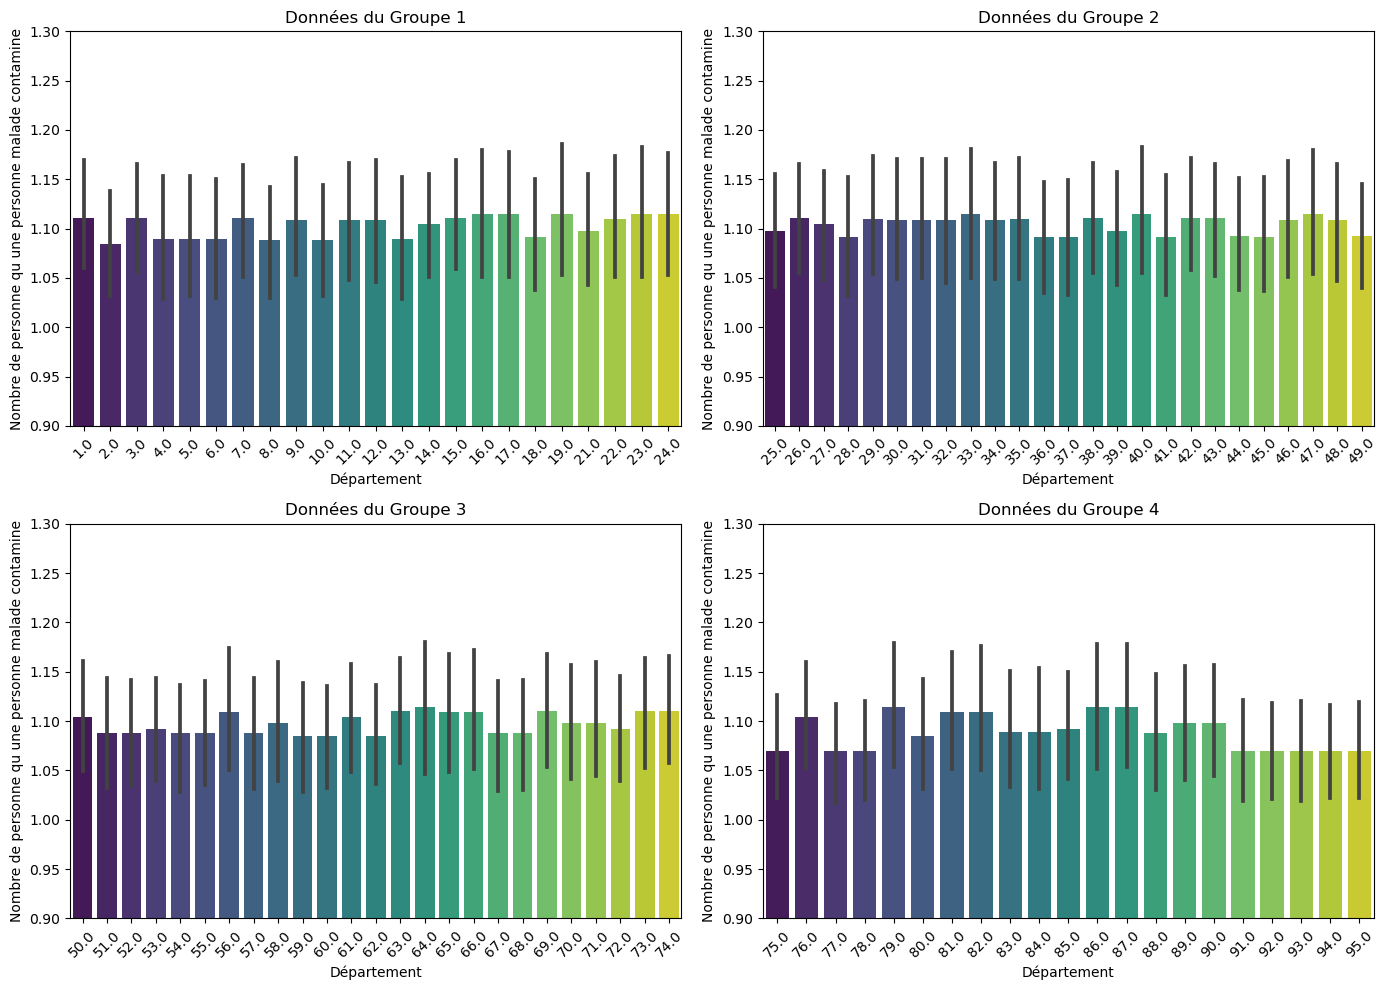

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('table-indicateurs-open-data-dep-serie.csv')

# Convertir la colonne 'departement' en type numérique
df['departement'] = pd.to_numeric(df['departement'], errors='coerce')

# Compter le nombre de départements uniques
nombre_departements = df['departement'].nunique()

# Définir les points de coupure pour diviser les départements en 4 groupes égaux
cut_points = [0] + [(i+1) * nombre_departements // 4 for i in range(3)] + [nombre_departements]

# Créer une nouvelle colonne 'groupe' en fonction des points de coupure
df['groupe'] = pd.cut(df['departement'], bins=cut_points, labels=['Groupe 1', 'Groupe 2', 'Groupe 3', 'Groupe 4'])

# Créer une grille de sous-graphiques
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Afficher les données de chaque groupe dans un sous-graphique distinct
for i, (groupe, data_groupe) in enumerate(df.groupby('groupe')):
    ax = axes[i // 2, i % 2]  # Sélectionner le sous-graphique correspondant
    sns.barplot(data=data_groupe, x='departement', y='R', ax=ax, palette='viridis')
    ax.set_title(f'Données du {groupe}')
    ax.set_xlabel('Département')
    ax.set_ylabel('Nombre de personne qu une personne malade contamine')
    ax.tick_params(axis='x', rotation=45)
    ax.set_ylim(0.9, 1.3)
    

plt.tight_layout()
plt.show()

